In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.ensemble import AdaBoostClassifier

### Fill missing values with zero

In [2]:
df = pd.read_csv('Train.csv' )
df.fillna('0',inplace=True)
#df.fillna(df.mean(), inplace=True)
#df = df.dropna()

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])

### Using only Day and Month for beginning/end of month (pay days) Analysis 

In [4]:
#model.fit(X_train, y_train)
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,day,month
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1,92,29,36,0,4,7
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1,103,142,34,1,18,7
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1,110,93,34,1,15,3
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1,72,29,34,1,13,2
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0,112,29,43,1,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,CR_88991,2002-01-11,1,47,48,7,3,15,10,1,5,1,174,0,98,29,34,1,11,1
23852,CR_46369,1997-02-05,0,33,32,2,1,5,6,0,5,1,174,0,112,29,43,1,5,2
23853,CR_157556,2012-04-03,0,25,25,9,0,3,5,1,6,1,174,0,10,29,18,1,3,4
23854,CR_103180,2004-01-25,0,39,39,6,5,2,7,1,6,1,127,0,112,103,43,1,25,1


### Preparing Test and Train data

In [5]:
df = df.drop(['DATE'], axis=1)
df = df.set_index('INCIDENT_ID')
#target = df['MULTIPLE_OFFENSE']
target = 'MULTIPLE_OFFENSE'
X = df.loc[:, df.columns != target]
Y = df.loc[:, df.columns == target]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=8)
X_train.head()
#X_test.head()
#y_train.head()
#y_test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,day,month
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_108372,0,24,24,0,0,2,7,1,6,1,249,1,42,29,34,8,8
CR_129204,1,9,10,7,3,15,10,1,6,3,0,3,72,130,34,22,3
CR_140331,0,38,38,10,3,2,7,0,5,1,174,0,24,29,0,9,9
CR_164341,0,33,32,2,1,6,4,0,5,1,0,1,103,29,34,16,4
CR_167810,1,4,4,6,5,16,12,1,6,1,0,1,87,62,34,24,6


### Make INCIDENT_ID as index and drop Date column

In [6]:
df_test = pd.read_csv('Test.csv')
df_test.fillna('0',inplace=True)
df_test['DATE'] = pd.to_datetime(df_test['DATE'])
df_test['day'] = df_test['DATE'].dt.day
df_test['month'] = df_test['DATE'].dt.month
df_test = df_test.set_index('INCIDENT_ID')
df_test

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,day,month
INCIDENT_ID,,,,,,,,,,,,,,,,,,
CR_195453,2018-02-01,0,30,35,7,3,6,4,0,5,1,174,0,72,119,23,1,2
CR_103520,2004-03-05,0,44,44,1,3,7,1,4,6,1,316,0,12,29,34,5,3
CR_196089,2018-01-27,0,34,33,3,5,2,7,3,0,1,316,1,72,0,34,27,1
CR_112195,2006-08-18,7,3,2,3,5,9,8,0,5,1,174,1,112,87,34,18,8
CR_149832,2011-10-31,0,7,8,7,3,2,7,1,5,1,174,0,112,93,43,31,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR_44468,1997-11-28,1,22,22,7,3,15,10,0,5,1,174,0,72,29,43,28,11
CR_158460,2012-06-09,0,35,30,3,5,1,0,2,3,2,0,2,72,93,34,9,6
CR_115946,2006-04-22,0,26,27,9,0,6,4,2,6,1,0,1,72,62,34,22,4


In [7]:
df_test = df_test.drop(['DATE'], axis=1)
df_test

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,day,month
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_195453,0,30,35,7,3,6,4,0,5,1,174,0,72,119,23,1,2
CR_103520,0,44,44,1,3,7,1,4,6,1,316,0,12,29,34,5,3
CR_196089,0,34,33,3,5,2,7,3,0,1,316,1,72,0,34,27,1
CR_112195,7,3,2,3,5,9,8,0,5,1,174,1,112,87,34,18,8
CR_149832,0,7,8,7,3,2,7,1,5,1,174,0,112,93,43,31,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR_44468,1,22,22,7,3,15,10,0,5,1,174,0,72,29,43,28,11
CR_158460,0,35,30,3,5,1,0,2,3,2,0,2,72,93,34,9,6
CR_115946,0,26,27,9,0,6,4,2,6,1,0,1,72,62,34,22,4


### I select Random Forest Classifier because of better Accuracy

In [8]:
RF = RandomForestClassifier(n_estimators=20, n_jobs = -1,random_state = 15,max_features = "auto")
RF.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

# Function for Accuracy and F score with Confusion Matrix

In [9]:
def generate_accuracy_and_heatmap(model, x, y):
    cm = confusion_matrix(y,model.predict(x))
    sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
#    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),pd.Series(y['Outcome'],name='Actual')))
    return 1

In [10]:
y_predicted = RF.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Accuracy is:  0.9942842626698845
F1 score is:  0.997003795192756


1

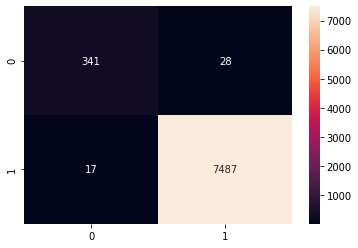

In [11]:
model = RF.fit(X_train, y_train.values.ravel())
generate_accuracy_and_heatmap(model, X_test, y_test)

### All the Numerical columns for finding Correlation

In [12]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['X_1',
 'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_13',
 'X_14',
 'X_15',
 'MULTIPLE_OFFENSE',
 'day',
 'month']

In [13]:
target = 'MULTIPLE_OFFENSE'

### Finding the Correlation b/w all the Features

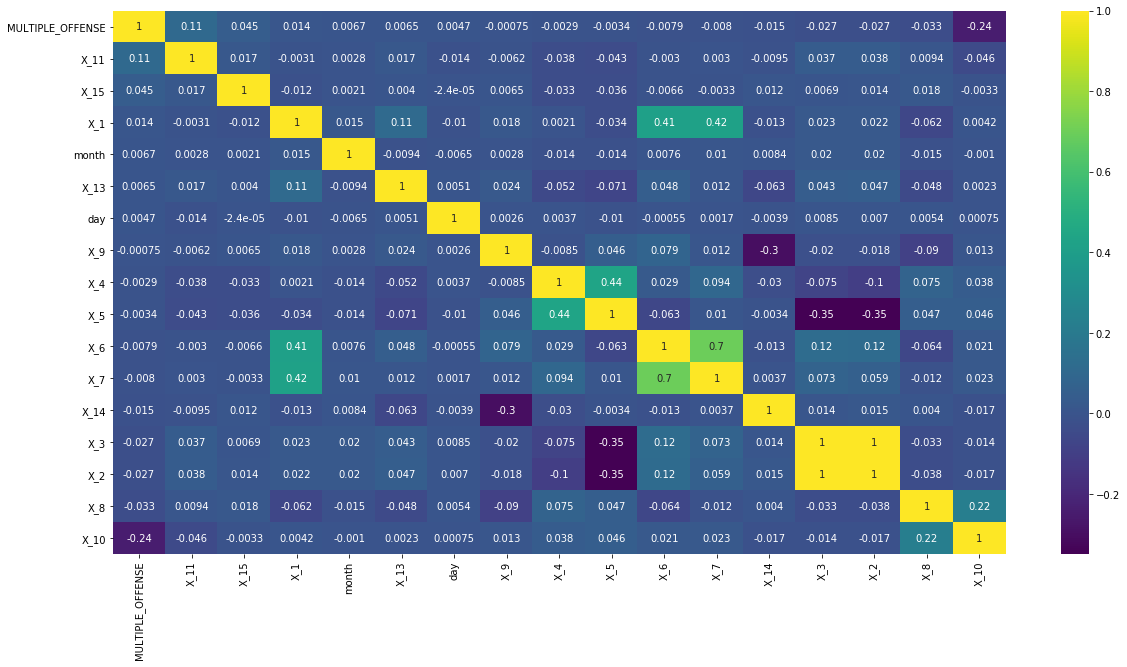

In [14]:
k = 17 #number of variables for heatmap
cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

#### Note:- As we can see there X_10 is -ive Correlated and X_11 is +ive Correlated with our Target so these 2 features are very important for our model.

## Let's see how many FEATURES are so important for our model prediction

# Recursive feature elimination with cross validation 

In [15]:
rfecv = RFECV(estimator=RF, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train.values.ravel())
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 4
Best features : Index(['X_10', 'X_11', 'X_12', 'X_15'], dtype='object')


#### As we can see above also X_10 and X_11 features present with X_12 and X_15
### Let's see our model accuracy corresponding with all features

In [16]:
rfecv.grid_scores_

array([0.98842506, 0.98779938, 0.99286737, 0.99837326, 0.9973097 ,
       0.9966839 , 0.9964963 , 0.99349316, 0.99580816, 0.99380575,
       0.99236692, 0.99324277, 0.99023972, 0.99111552, 0.99061483,
       0.99167847, 0.99111552])

### As we can see our best accuracy is 0.99837326 with optimal number of features 4

## Let's see by Visualization

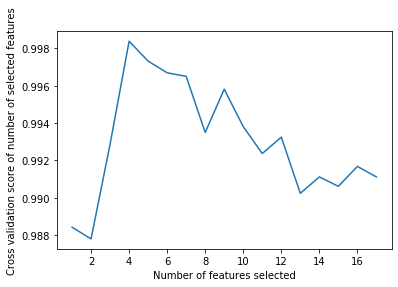

In [17]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### We have to Transform our train and test data

In [18]:
x_train_rfecv = rfecv.transform(X_train)
x_test_rfecv = rfecv.transform(X_test)

In [19]:
rf_rfecv_model = RF.fit(x_train_rfecv, y_train.values.ravel())

Accuracy is:  0.9977137050679538
F1 score is:  0.9988003199146894


1

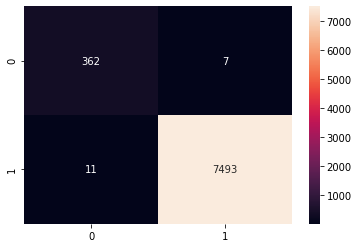

In [20]:
generate_accuracy_and_heatmap(rf_rfecv_model, x_test_rfecv, y_test)

## As we can see our RF Acuracy is 0.9942

## After selecting only optimal FEATURE our Acuracy is improve i.e. 0.9977

# That's why selecting optimal feature is very important in ML

### Using Ada Boosting classifier for improve accuracy 

In [21]:
# Create adaboost classifer object base on RFECV model
#define learning rate for best fit learning score
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    boostmodel =  AdaBoostClassifier(base_estimator=rf_rfecv_model ,n_estimators=50,learning_rate=1)
    boostmodel.fit(x_train_rfecv, y_train.values.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (Testing): {0:.3f}".format(boostmodel.score(x_train_rfecv, y_train.values.ravel())))

Learning rate:  0.05
Accuracy score (Testing): 1.000
Learning rate:  0.075
Accuracy score (Testing): 1.000
Learning rate:  0.1
Accuracy score (Testing): 1.000
Learning rate:  0.25
Accuracy score (Testing): 1.000
Learning rate:  0.5
Accuracy score (Testing): 1.000
Learning rate:  0.75
Accuracy score (Testing): 1.000
Learning rate:  1
Accuracy score (Testing): 1.000


In [22]:
boostmodel =  AdaBoostClassifier(base_estimator=rf_rfecv_model ,n_estimators=20,learning_rate=1)

In [23]:
# Train Adaboost Classifer
ada_model = boostmodel.fit(x_train_rfecv, y_train.values.ravel())

Accuracy is:  1.0
F1 score is:  1.0


1

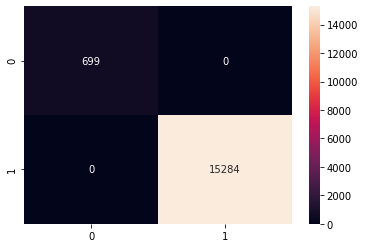

In [24]:
generate_accuracy_and_heatmap(ada_model,x_train_rfecv, y_train.values.ravel())

In [25]:
df_test = df_test[['X_10', 'X_11', 'X_12', 'X_15']]
y_predicted = ada_model.predict(df_test)
Yhat=pd.DataFrame(y_predicted,columns=['MULTIPLE_OFFENSE'])
var =pd.DataFrame(df_test.index)
df_col = pd.concat([var,Yhat], axis=1)
df_col.to_csv("Prediction.csv",index=False)

## Above code is a Transformation of our prediction according to Hacker Earth output formate